# PCSO Draws Dataset

##### Import all the required libraries for data cleaning and wrangling


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset


In [2]:
pcso_df = pd.read_csv('./Lotto.csv')

### Inspecting the dataset

In [3]:
pcso_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32251 entries, 0 to 32250
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LOTTO GAME    32248 non-null  object 
 1   COMBINATIONS  32248 non-null  object 
 2   DRAW DATE     32248 non-null  object 
 3   JACKPOT (?)   32248 non-null  float64
 4   WINNERS       32248 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.2+ MB


In [4]:
pcso_df['LOTTO GAME'].value_counts()

Suertres Lotto 11AM       3624
EZ2 Lotto 11AM            3624
Suertres Lotto 4PM        3623
Suertres Lotto 9PM        3623
EZ2 Lotto 4PM             3623
EZ2 Lotto 9PM             3623
Grand Lotto 6/55          1571
Megalotto 6/45            1570
Lotto 6/42                1562
Superlotto 6/49           1561
4Digit                    1506
6Digit                    1496
Ultra Lotto 6/58           977
EZ2 Lotto Vismin 9PM       181
4D Vismin                   72
Suertres Lotto 11:30AM       2
Suertres Lotto 12:30PM       2
Suertres Lotto 2PM           2
EZ2 Lotto 2PM                2
EZ2 Lotto 11:30AM            2
EZ2 Lotto 12:30PM            2
Name: LOTTO GAME, dtype: int64

### Disregard all other games, we only need the 6/xx major games

In [5]:
games_list = ["Lotto 6/42", "Megalotto 6/45", "Superlotto 6/49", "Grand Lotto 6/55", "Ultra Lotto 6/58"]
games_df = pcso_df.loc[pcso_df['LOTTO GAME'].isin(games_list)]

### Separate the games into its own dataframes (optional)

In [6]:
lotto = games_df.loc[games_df['LOTTO GAME'] == 'Lotto 6/42']
mega_lotto = games_df.loc[games_df['LOTTO GAME'] == 'Megalotto 6/45']
super_lotto = games_df.loc[games_df['LOTTO GAME'] == 'Superlotto 6/49']
grand_lotto = games_df.loc[games_df['LOTTO GAME'] == 'Grand Lotto 6/55']
ultra_lotto = games_df.loc[games_df['LOTTO GAME'] == 'Ultra Lotto 6/58']

all_games = [lotto, mega_lotto, super_lotto, grand_lotto, ultra_lotto]

### Create a counter function

This function loops through the dataframe's combination column to extract all the drawn numbers.

In [7]:
def draw_count(dataframe: pd.DataFrame):
    nums = dataframe["COMBINATIONS"].str.split('-', n=6, expand=True)
    nums = pd.melt(nums).iloc[:, [1]]
    nums['value'] = nums['value'].apply(int)
    nums = nums['value'].to_list()

    # returns a list of all numbers drawn based on the dataset.
    return nums


### See the frequency chart for all games

Loops through all major games and displays the distribution plots for all the winning draws

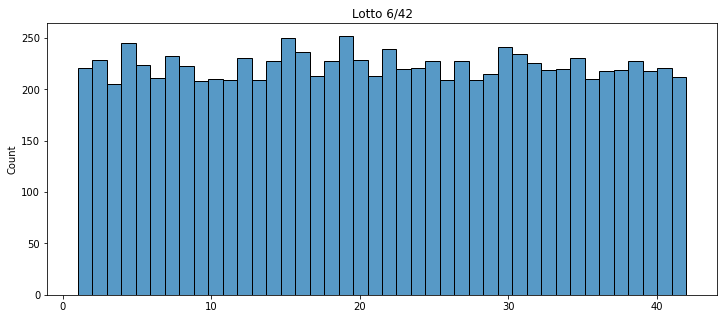

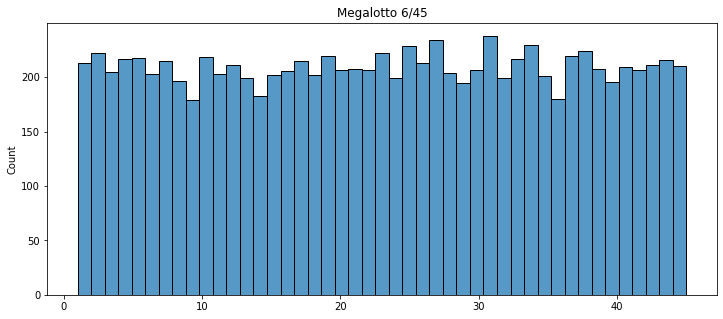

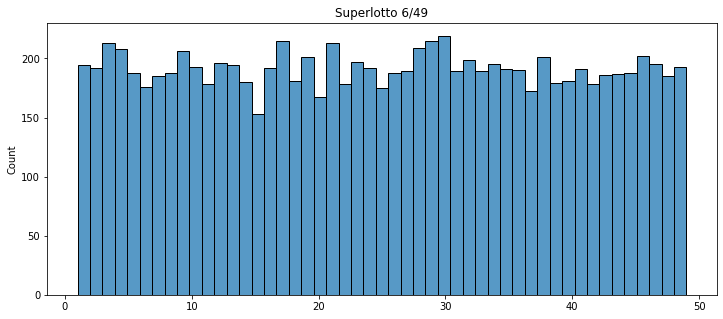

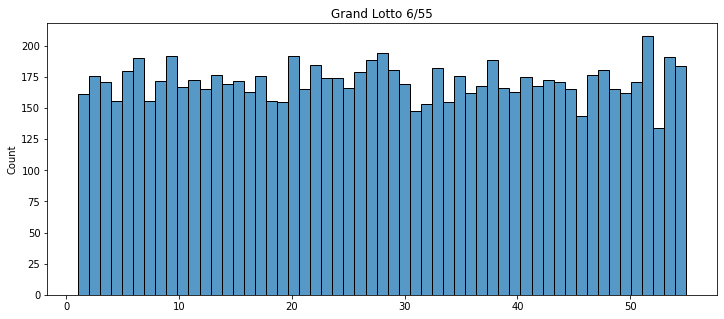

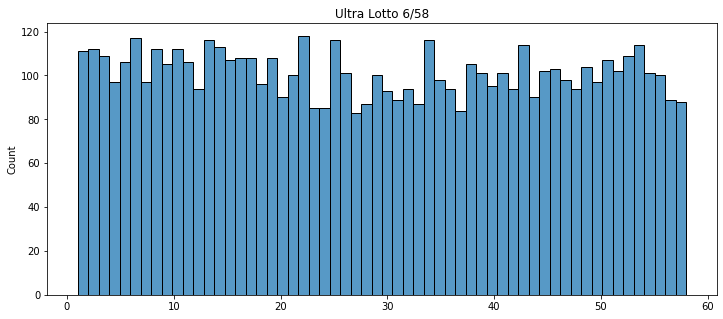

In [15]:
for name, game in zip(games_list, all_games):
    n = draw_count(game)
    plt.figure(figsize=(12,5))
    plt.title(f"{name}")
    sns.histplot(n, bins=max(n))
    plt.show()


#### Distribution plot for all the games (combined)

We can see that there is really a uniform distribution for the winning draws

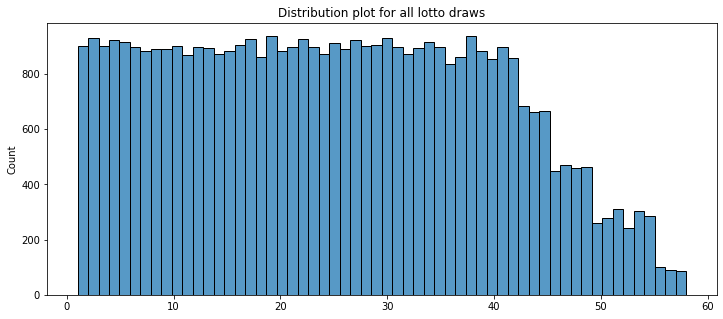

In [14]:
n = draw_count(games_df)
plt.figure(figsize=(12,5))
plt.title(f"Distribution plot for all lotto draws")
sns.histplot(n, bins=58)
plt.show()

### Bonus: What numbers are the best bet?
For each game, what are the top 6 most recurring number based on the current dataset?


Disclaimer: as concluded above, the numbers are evenly distributed among all the numbers (flat distribution plot). Therefore, these numbers are in no way a financial advice, and is just to be used to summarize the data above. 


In [10]:
for name, game in zip(games_list, all_games):
    counter = {}
    draws = draw_count(game)

    for draw in draws:
        counter[draw] = counter.get(draw, 0) + 1
    counter = {k: v for k, v in sorted(counter.items(), key=lambda item: item[1], reverse=True)}
    top_numbers = list(counter.keys())[:6]
    
    print(f"{name}: {top_numbers}")


Lotto 6/42: [19, 15, 4, 30, 22, 16]
Megalotto 6/45: [31, 27, 34, 25, 38, 2]
Superlotto 6/49: [30, 17, 29, 21, 3, 28]
Grand Lotto 6/55: [52, 28, 9, 20, 54, 6]
Ultra Lotto 6/58: [22, 6, 25, 34, 13, 54]
